# Sales Analysis

importing necessary libraries

In [96]:
import pandas as pd
import  os
import warnings
warnings.filterwarnings('ignore')

Task 1:merging 12 month of data in a single file

In [97]:
df = pd.read_csv("./Sales data/Sales_April_2019.csv")

files = [file for file in os.listdir("./Sales data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_data.csv")


Read in updated dataframe

In [98]:
data = pd.read_csv("all_data.csv")
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# cleaning up the data

In [99]:
# removing null values
data.dropna(inplace = True)
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [100]:
# removing "Or" from order date column
data = data[data["Order Date"].str[0:2] !="Or"]
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [101]:
#changing datatypes
data.dtypes

Unnamed: 0           int64
Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [102]:
data["Price Each"] = pd.to_numeric(data["Price Each"])
data["Quantity Ordered"] = pd.to_numeric(data["Quantity Ordered"])

# Augment data with additional columns

Task 2 : Add month column

In [103]:
data["Month"] = data["Order Date"].str[0:2]
data["Month"] = data["Month"].astype('int32')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


task3 :Add sales column

In [104]:
data["Sales"] = data["Quantity Ordered"] * data["Price Each"]
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...,...
186845,11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


task 4 : Add a city column

In [105]:
#by using .apply()
def get_address(address):
    return address.split(",")[1]

def get_state(ad):
    return ad.split(",")[2].split(' ')[1]
    

data["City"] = data["Purchase Address"].apply(lambda x: get_address(x)+ " " +get_state(x))
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


# Ques 1. What was the best month for sales? How much was earned that month?

In [106]:
res= data.groupby("Month").sum()
res

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,47433245,10903,1811768.38,1822256.73
2,72123197,13449,2188884.72,2202022.42
3,115333587,17005,2791207.83,2807100.38
4,167977608,20558,3367671.02,3390670.24
5,137829259,18667,3135125.13,3152606.75
6,92330356,15253,2562025.61,2577802.26
7,102752005,16072,2632539.56,2647775.76
8,71824951,13448,2230345.42,2244467.88
9,67863032,13109,2084992.09,2097560.13


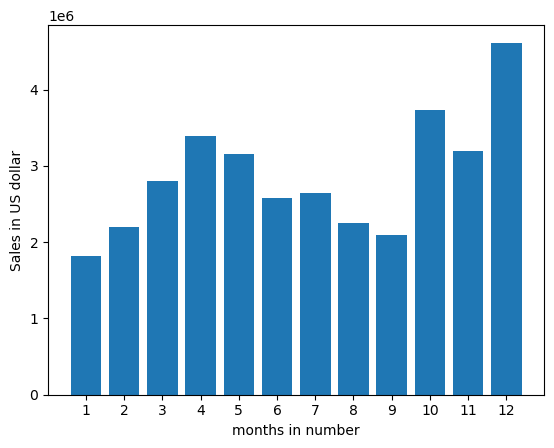

In [107]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,res["Sales"])
plt.xticks(months)
plt.ylabel('Sales in US dollar')
plt.xlabel("months in number")
plt.show()


# Ques 2. what US city has the hightest sales?

In [108]:
highest = data.groupby('City').sum()
highest

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta GA,122928154,16602,2779908.20,104794,2795498.58
Austin TX,82709457,11153,1809873.61,69829,1819581.75
Boston MA,165758780,22528,3637409.77,141112,3661642.01
Dallas TX,124308328,16730,2752627.82,104620,2767975.40
Los Angeles CA,247743297,33289,5421435.23,208325,5452570.80
New York City NY,208439450,27932,4635370.83,175741,4664317.43
Portland ME,20641344,2750,447189.25,17144,449758.27
Portland OR,83402354,11303,1860558.22,70621,1870732.34
San Francisco CA,372569180,50239,8211461.74,315520,8262203.91


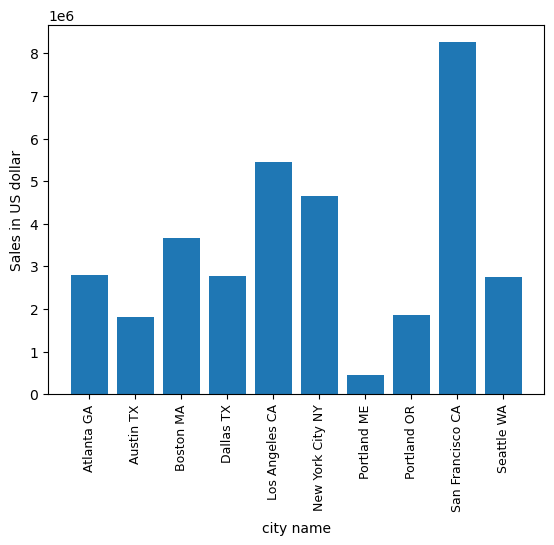

In [109]:
cities = [city for city , df in data.groupby("City")]

plt.bar(cities,highest["Sales"])
plt.xticks(cities, rotation = 'vertical',size=9)
plt.ylabel('Sales in US dollar')
plt.xlabel("city name")
plt.show()

# Ques 3: what time should we display advertisements to maximise likelihood of customer's buying product?

In [110]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [111]:
data["Hour"] = data['Order Date'].dt.hour
data["Minute"] = data['Order Date'].dt.minute
data.head(3)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38


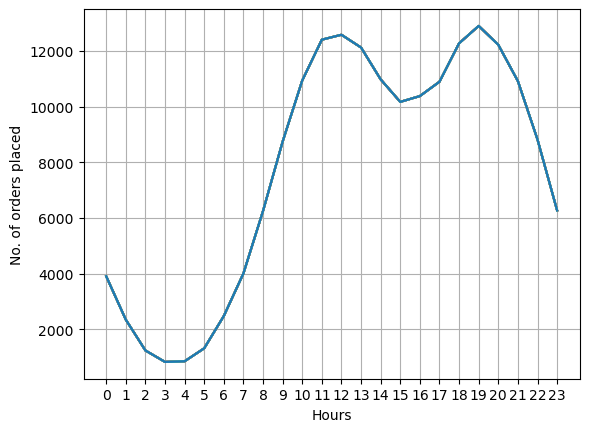

In [112]:
hours = [hour for hour, df in data.groupby('Hour')]
         
plt.plot(hours,data.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel("No. of orders placed")
plt.grid()
plt.show()

# after analysis around 11am or 7pm

# Ques 4 : What products are most often sold together?

In [113]:
df = data[data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [114]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key, value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Ques 5: What product sold the most? Why do you think it sold the most?

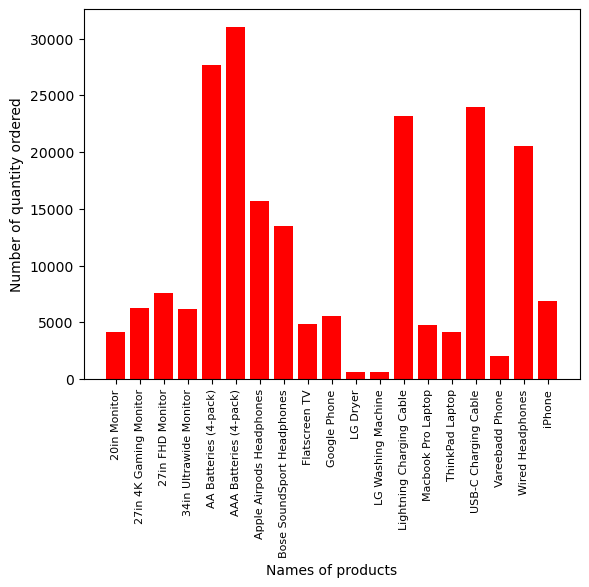

In [115]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered,color = 'red')
plt.xticks(products,rotation = 'vertical', size = 8)
plt.xlabel("Names of products")
plt.ylabel("Number of quantity ordered")
plt.show()

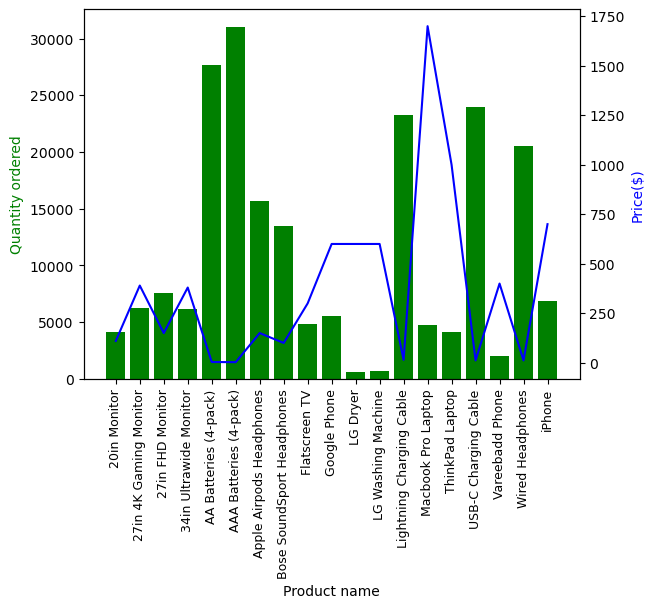

In [116]:
prices = data.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered, color = 'g')
ax2.plot(products,prices, "b-")

ax1.set_xlabel("Product name")
ax1.set_ylabel("Quantity ordered",color = 'g')

ax2.set_ylabel("Price($)",color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical',size = 9)

plt.show()